<a href="https://colab.research.google.com/github/Bokocki/135UM-Homework/blob/main/Homework04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Homework Assignment: Analyzing and Plotting Bias in Penalized Regression**

-------------------------------

In this assignment, you will explore how **Ridge** and **Lasso** regression introduce **bias** into a model to reduce **variance**, and how the choice of the regularization parameter $\lambda$ affects this trade-off. The goal is to visualize and analyze the **bias-variance trade-off** and understand the conditions under which penalization helps or hinders model performance.

## **The Question**

**How does varying the regularization parameter $\lambda$ in Ridge and Lasso regression impact the trade-off between bias and variance?**

- Generate a synthetic dataset based on a **known** linear relationship:
  
  $$
  y = \beta_0 + \beta_1 x + \ldots + \epsilon
  $$

  where $$\epsilon \sim \mathcal{N}(0, \sigma^2),$$

  use a **high-dimensional** setting (e.g., 50 predictors) with only a few non-zero true coefficients to emphasize the effects of regularization. I stress, the $\beta_i$ coefficients should be known for this experiment and they should be mostly 0, with only a few non-zero parameters.

- Investigate how increasing $\lambda$ influences the model’s **bias**, **variance**, and **Mean Squared Error (MSE)**.
- Plot **Bias²**, **Variance**, and **MSE** on a single graph for both Ridge and Lasso models.
- Explain MSE decomposition into bias and variance. Read more on the MSE decomposition if you need to.

**Does the regularization lead to an optimal trade-off point where MSE is minimized? Explain why this point exists.**




**Expected Outcome:**
 - As $\lambda$ increases:
   - **Bias** increases (the model becomes too simple).
   - **Variance** decreases (the model becomes more stable).
   - **MSE** forms a **U-shape**, revealing the optimal trade-off.

- Analyze how **Ridge** and **Lasso** differ in terms of their bias-variance trade-offs.
- Discuss situations where one method may outperform the other, considering factors like **feature sparsity** and **multicollinearity**.


## **Colab Notebook Requirements**
- Your **Colab notebook** should:
  - Simulate the synthetic dataset and apply Ridge and Lasso regression.
  - Plot **Bias²**, **Variance**, and **MSE** against $\lambda$ for both models.
  - Include a section answering the questions.
  - Be well-documented with comments and explanations for each step.


## **Publish on GitHub**
- Upload your Colab notebook to your **GitHub repository** for this course.
- In your repository’s **README**, include a **link** to the notebook.
- In the notebook include **“Open in Colab”** badge so the notebook can be launched directly from GitHub.


# Answer to the homework

---

## Visualizing bias-variance trade-off

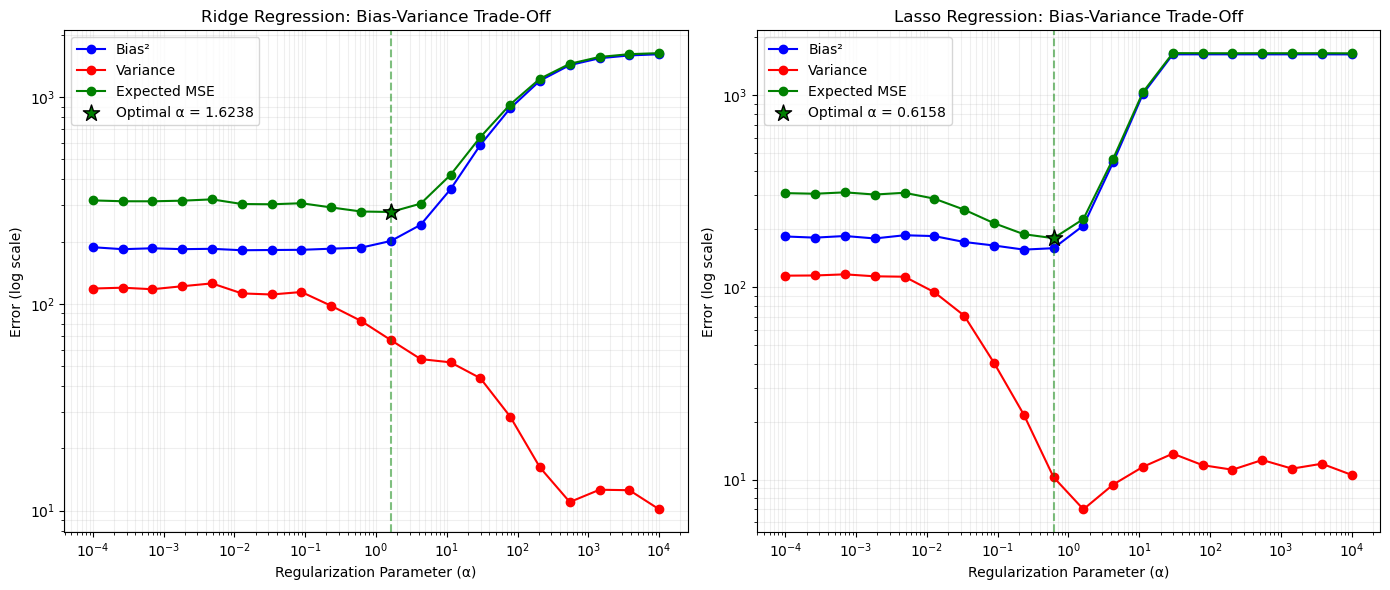

Ridge optimal alpha: 1.623777, minimum MSE: 278.180250
Lasso optimal alpha: 0.615848, minimum MSE: 179.926499


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import train_test_split
from mlxtend.evaluate import bias_variance_decomp

# Parameters and setup for model
np.random.seed(42)
n_samples = 200
n_features = 50
noise = 10
true_beta = np.zeros(n_features)
true_beta[:5] = np.array([-50, 10, 30, -20, 5])
X = np.random.uniform(-1, 1, size=(n_samples, n_features))
y = X @ true_beta + np.random.normal(scale=noise, size=n_samples)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4)

# Define alphas (regularization strengths) to test
alphas = np.logspace(-4, 4, 20)

# Dictionaries to store results
ridge_results = {'bias': [], 'variance': [], 'mse': []}
lasso_results = {'bias': [], 'variance': [], 'mse': []}

# Calculate bias-variance decomposition for each alpha
for alpha in alphas:
    # Ridge regression
    _, avg_bias, avg_var = bias_variance_decomp(
        Ridge(alpha=alpha), X_train, y_train, X_test, y_test,
        loss='mse'
    )
    ridge_results['bias'].append(avg_bias)
    ridge_results['variance'].append(avg_var)
    ridge_results['mse'].append(avg_bias+avg_var+noise)
    
    # Lasso regression
    _, avg_bias, avg_var = bias_variance_decomp(
        Lasso(alpha=alpha), X_train, y_train, X_test, y_test,
        loss='mse'
    )
    lasso_results['bias'].append(avg_bias)
    lasso_results['variance'].append(avg_var)
    lasso_results['mse'].append(avg_bias+avg_var+noise)

# Find optimal alpha values (lowest MSE)
ridge_optimal_idx = np.argmin(ridge_results['mse'])
ridge_optimal_alpha = alphas[ridge_optimal_idx]
ridge_min_mse = ridge_results['mse'][ridge_optimal_idx]

lasso_optimal_idx = np.argmin(lasso_results['mse'])
lasso_optimal_alpha = alphas[lasso_optimal_idx]
lasso_min_mse = lasso_results['mse'][lasso_optimal_idx]

# Create figure with two subplots on loglog scale
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Ridge plot
axes[0].loglog(alphas, ridge_results['bias'], 'b-o', label='Bias²')
axes[0].loglog(alphas, ridge_results['variance'], 'r-o', label='Variance')
axes[0].loglog(alphas, ridge_results['mse'], 'g-o', label='Expected MSE')
# Highlight optimal alpha
axes[0].scatter([ridge_optimal_alpha], [ridge_min_mse], s=150, c='green', 
                marker='*', edgecolors='black', zorder=10,
                label=f'Optimal α = {ridge_optimal_alpha:.4f}')
axes[0].axvline(x=ridge_optimal_alpha, color='green', linestyle='--', alpha=0.5)
axes[0].set_xlabel('Regularization Parameter (α)')
axes[0].set_ylabel('Error (log scale)')
axes[0].set_title('Ridge Regression: Bias-Variance Trade-Off')
axes[0].legend()
axes[0].grid(True, which="both", ls="-", alpha=0.2)

# Lasso plot
axes[1].loglog(alphas, lasso_results['bias'], 'b-o', label='Bias²')
axes[1].loglog(alphas, lasso_results['variance'], 'r-o', label='Variance')
axes[1].loglog(alphas, lasso_results['mse'], 'g-o', label='Expected MSE')
# Highlight optimal alpha
axes[1].scatter([lasso_optimal_alpha], [lasso_min_mse], s=150, c='green', 
                marker='*', edgecolors='black', zorder=10,
                label=f'Optimal α = {lasso_optimal_alpha:.4f}')
axes[1].axvline(x=lasso_optimal_alpha, color='green', linestyle='--', alpha=0.5)
axes[1].set_xlabel('Regularization Parameter (α)')
axes[1].set_ylabel('Error (log scale)')
axes[1].set_title('Lasso Regression: Bias-Variance Trade-Off')
axes[1].legend()
axes[1].grid(True, which="both", ls="-", alpha=0.2)

plt.tight_layout()
plt.show()

# Print optimal values
print(f"Ridge optimal alpha: {ridge_optimal_alpha:.6f}, minimum MSE: {ridge_min_mse:.6f}")
print(f"Lasso optimal alpha: {lasso_optimal_alpha:.6f}, minimum MSE: {lasso_min_mse:.6f}")

## Answer to the questions

If we assume that $Y=f(X)+\varepsilon$, where $E(\varepsilon)=0$ and $\hat{f}$ represents the model fitted to the training data, then we can show that

$$
\text{MSE} = E\left((Y - \hat{f}(X))^2 \mid X = x_0\right) = \underbrace{(E\hat{f}(x_0) - f(x_0))^2}_{\text{Bias}^2} + \underbrace{\text{Var}(\hat{f}(x_0))}_{\text{Variance}} + \underbrace{\text{Var}(\varepsilon)}_{\text{Irreducible Error}}.
$$

Bias measures systematic deviation from the true function, variance captures model sensitivity to training data fluctuations, and irreducible error is the unavoidable noise. Minimizing MSE requires balancing bias and variance, which often conflict.

The bias-variance trade-off is governed by model flexibility. Highly flexible models, e.g. such as those that interpolate the data, tend to exhibit low bias but high variance, meaning small changes in the training data can lead to dramatically different fitted models. On the other hand, simple models like fitting a constant mean have high bias but low variance, producing stable predictions across different datasets. This trade-off explains the characteristic U-shaped MSE curve observed when varying some parameter responsible for model flexibility. The optimal parameter strikes a balance between these extremes, minimizing the total MSE.

In regularization regressions like lasso and ridge, as the regularization parameter increases, the bias tends to increase and the variance tends to decrease, since we are effectively putting a constraint on the values the regression estimates. This behavior can be seen on the plots above. Non-constrained regressions occur when $\alpha=0$, but our results show that for both regressions the lowest MSE occurs for non-zero parameters of $\alpha$. We were able to decrease MSE by reducing variance more than increasing the bias.

Lasso regression, which uses L1 regularization, tends to set some coefficients to exactly zero, effectively performing feature selection. This makes lasso particularly effective for data where many true coefficients are zero, just like in our example. Ridge regression, employing L2 regularization, shrinks coefficients smoothly without setting them to zero. Consequently, lasso achieves lower MSE on our data. The sharper variance reduction for lasso regression also occurs because lasso sets many parameters to zero; with fewer parameters free to vary, the model becomes more stable, leading to lower variance.

These differences have important practical implications. When working with datasets where most features are irrelevant (feature sparsity), lasso is typically preferred as it will automatically identify and discard these features. In cases where predictors are highly correlated (multicollinearity), ridge regression often performs better since it maintains all predictors while appropriately dampening their coefficients. In our specific experiment, lasso achieved better performance due to the true model's sparsity, but ridge would typically perform better for datasets with strong multicollinearity.